In [1]:
# Step 1: Install libraries
!pip install seaborn
!pip install pandas
!pip install numpy
!pip3 install pandas
!pip install matplotlib
!pip install xgboost
!pip install catboost
!pip install regex
!pip install scikit-learn
!pip install lightgbm
!pip install missingno
!pip install plotly.express


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 58.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 38.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 40.2 MB/s eta 0:0

In [2]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import csv 
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics
import matplotlib.pyplot as plt  # For data visualization

In [3]:
#Step 3: Aqcuire dataset
diabetes = pd.read_csv('/workspaces/SP25-Project/data/diabetic_data.csv')

In [4]:
#Step 4: Explore and understand dataset
print(diabetes.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [5]:
diabetes.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
#Step 5: Clean dataset
diabetes.replace('?', np.nan, inplace=True)

In [7]:
diabetes.drop_duplicates(inplace=True)

In [8]:
# Define columns to drop
# 'encounter_id', 'patient_nbr''admission_type_id', 'discharge_disposition_id', 'admission_source_id','payer_code' are patient identifying factors that do not contribute to model

# 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton''glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone' are medications deemed by our group as insigificant

# 'diag_1', 'diag_2', 'diag_3',
# 'change'
# 'medical_specialty'

columns_to_drop = [
    'encounter_id', 'patient_nbr', 'weight',
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'examide', 'citoglipton',
    'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed'
]

# Drop the columns from the 'diabetes' dataframe
diabetes_cleaned = diabetes.drop(columns=columns_to_drop)

# View cleaned dataframe
diabetes_cleaned.head(10)


,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,1,NaN,NaN,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,9,NaN,NaN,Up,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,6,NaN,NaN,No,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,7,NaN,NaN,Up,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,5,NaN,NaN,Steady,NO
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,9,NaN,NaN,Steady,>30
6,Caucasian,Male,[60-70),4,70,1,21,0,0,0,7,NaN,NaN,Steady,NO
7,Caucasian,Male,[70-80),5,73,0,12,0,0,0,8,NaN,NaN,No,>30
8,Caucasian,Female,[80-90),13,68,2,28,0,0,0,8,NaN,NaN,Steady,NO
9,Caucasian,Female,[90-100),12,33,3,18,0,0,0,8,NaN,NaN,Steady,NO


In [9]:
#Step 6: One-Hot Encoding

#"Race"
diabetes_cleaned = pd.get_dummies(
    diabetes_cleaned,
    columns=['race'],
    drop_first=True
)
#"Insulin"
insulin_dummies = pd.get_dummies(diabetes_cleaned['insulin'], prefix='insulin')
diabetes_cleaned = pd.concat([diabetes_cleaned, insulin_dummies], axis=1)
diabetes_cleaned.drop('insulin', axis=1, inplace=True)

In [10]:
#Step 7: Map categories to numerical values

#'Readmitted'
diabetes_cleaned['readmitted'] = diabetes_cleaned['readmitted'].map({'NO': 0,'>30': 0, '<30': 1})

#'Gender'
diabetes_cleaned['gender'] = diabetes_cleaned['gender'].replace({'Male': 1, 'Female': 0})

#Map "True" and "False" values to numerical 
diabetes_cleaned = diabetes_cleaned.replace({True: 1, False: 0})

#'A1Cresult', 'None' or 'Norm' = 0, anything abnormal ('>7', '>8') = 1
diabetes_cleaned['A1Cresult'] = diabetes_cleaned['A1Cresult'].apply(
    lambda x: 1 if x in ['>7', '>8'] else 0)

#'max_glu_serum', 'None' or 'Norm' = 0, anything abnormal ('>200', '>300') = 1
diabetes_cleaned['max_glu_serum'] = diabetes_cleaned['max_glu_serum'].apply(
    lambda x: 1 if x in ['>200', '>300'] else 0)

/tmp/ipykernel_6224/44349890.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_cleaned = diabetes_cleaned.replace({True: 1, False: 0})


In [11]:
#View changes
diabetes_cleaned.head(10)

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,A1Cresult,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,0,[0-10),1,41,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,[10-20),3,59,0,18,0,0,0,9,...,0,0,0,1,0,0,0,0,0,1
2,0,[20-30),2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,1,0,0
3,1,[30-40),2,44,1,16,0,0,0,7,...,0,0,0,1,0,0,0,0,0,1
4,1,[40-50),1,51,0,8,0,0,0,5,...,0,0,0,1,0,0,0,0,1,0
5,1,[50-60),3,31,6,16,0,0,0,9,...,0,0,0,1,0,0,0,0,1,0
6,1,[60-70),4,70,1,21,0,0,0,7,...,0,0,0,1,0,0,0,0,1,0
7,1,[70-80),5,73,0,12,0,0,0,8,...,0,0,0,1,0,0,0,1,0,0
8,0,[80-90),13,68,2,28,0,0,0,8,...,0,0,0,1,0,0,0,0,1,0
9,0,[90-100),12,33,3,18,0,0,0,8,...,0,0,0,1,0,0,0,0,1,0


In [12]:
# Step 8: Map age ranges to numerical midpoints
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
diabetes_cleaned['age'] = diabetes_cleaned['age'].map(age_mapping)
# Confirm changes
diabetes_cleaned[['age']].head(10)

,age
0,5
1,15
2,25
3,35
4,45
5,55
6,65
7,75
8,85
9,95


In [13]:
#Step 9: Fill missing numerical values with mean to treat data imbalance
numeric_cols = diabetes_cleaned.select_dtypes(include=['float64', 'int64']).columns
diabetes_cleaned[numeric_cols] = diabetes_cleaned[numeric_cols].fillna(diabetes_cleaned[numeric_cols].mean())

In [14]:
#Step 10: View cleaned dataframe
diabetes_cleaned.head(20)

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,A1Cresult,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,0,5,1,41,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,15,3,59,0,18,0,0,0,9,...,0,0,0,1,0,0,0,0,0,1
2,0,25,2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,1,0,0
3,1,35,2,44,1,16,0,0,0,7,...,0,0,0,1,0,0,0,0,0,1
4,1,45,1,51,0,8,0,0,0,5,...,0,0,0,1,0,0,0,0,1,0
5,1,55,3,31,6,16,0,0,0,9,...,0,0,0,1,0,0,0,0,1,0
6,1,65,4,70,1,21,0,0,0,7,...,0,0,0,1,0,0,0,0,1,0
7,1,75,5,73,0,12,0,0,0,8,...,0,0,0,1,0,0,0,1,0,0
8,0,85,13,68,2,28,0,0,0,8,...,0,0,0,1,0,0,0,0,1,0
9,0,95,12,33,3,18,0,0,0,8,...,0,0,0,1,0,0,0,0,1,0


In [18]:
#Step 11: Save cleaned dataframe as CSV file
# diabetes_cleaned.to_csv('/workspaces/SP25-Project/data/diabetes_cleaned.csv', index=False)
# print("Cleaned data saved to '/workspaces/SP25-Project/data/diabetes_cleaned.csv'")


In [19]:
#Correlation 
correlation_with_readmitted = diabetes_cleaned.corr(numeric_only=True)['readmitted'].sort_values(key=abs, ascending=False)
print(correlation_with_readmitted)

readmitted            1.000000
number_inpatient      0.165147
number_emergency      0.060747
number_diagnoses      0.049524
time_in_hospital      0.044199
num_medications       0.038432
insulin_No           -0.033278
insulin_Down          0.032115
insulin_Up            0.020563
num_lab_procedures    0.020364
number_outpatient     0.018893
age                   0.017634
A1Cresult            -0.014337
num_procedures       -0.012227
max_glu_serum         0.011398
race_Caucasian        0.007144
race_Other           -0.005962
race_Hispanic        -0.003415
race_Asian           -0.002578
insulin_Steady       -0.000660
Name: readmitted, dtype: float64


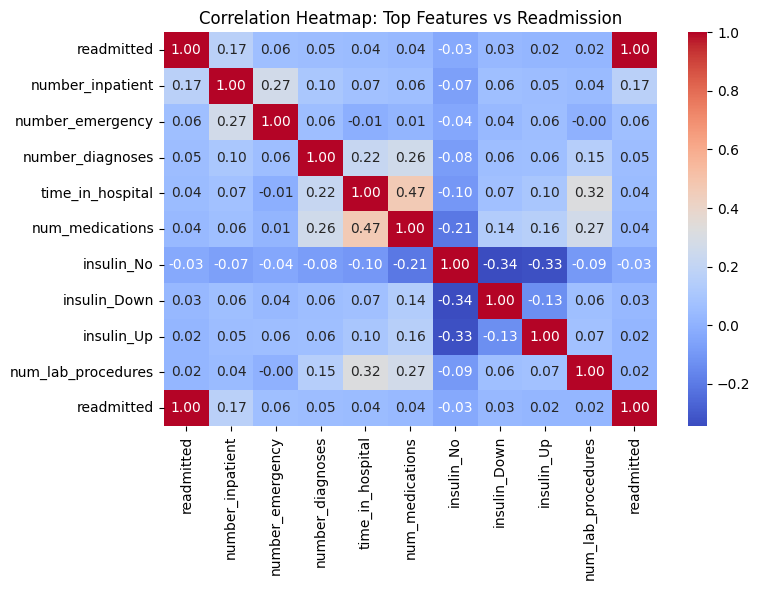

In [20]:
#Visualize Correlation of Top 10 Features - Heatmap 

# Determine top 10 
top_corr_features = correlation_with_readmitted.head(10).index.tolist()
top_corr_features.append('readmitted')  # target feature

# Filter dataset for these columns
corr_matrix = diabetes_cleaned[top_corr_features].corr()

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Top Features vs Readmission')
plt.tight_layout()
plt.show()

/tmp/ipykernel_48680/4286137646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.head(10).values, y=corr.head(10).index, palette='magma')


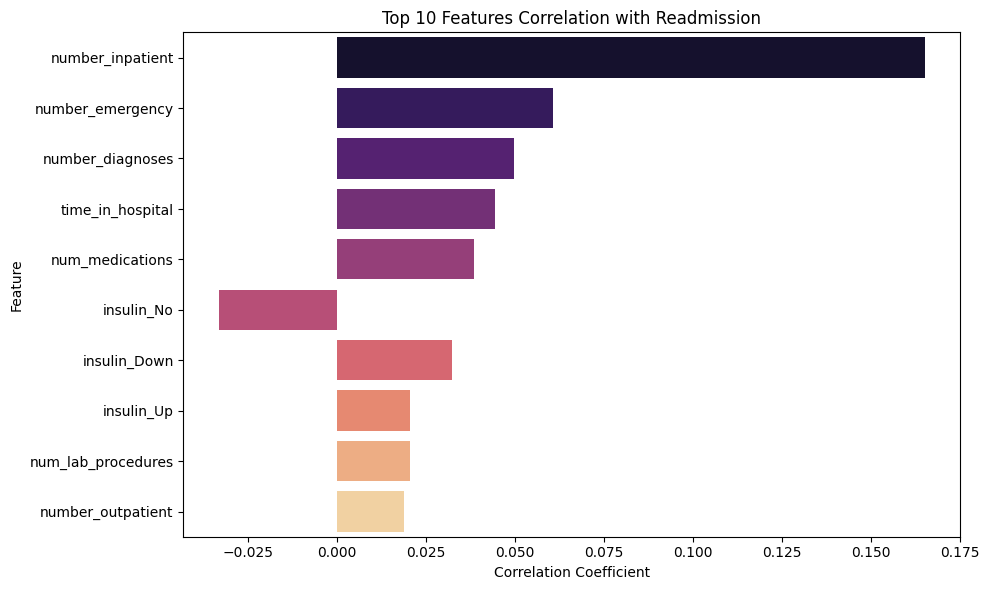

In [21]:
#Visualize Correlation of Top 10 Features - Bar Graph 

# Compute correlation with readmitted
corr = diabetes_cleaned.corr(numeric_only=True)['readmitted'].sort_values(key=abs, ascending=False)

# Skip 'readmitted' itself
corr = corr.drop('readmitted')

# Plot top 10 correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.head(10).values, y=corr.head(10).index, palette='magma')
plt.title('Top 10 Features Correlation with Readmission')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [22]:
#Visualization of Correlation between Race Features and Readmitted

# Extract columns that contain 'race'
race_columns = [col for col in diabetes_cleaned.columns if 'race' in col]

# Add 'readmitted' to the list of features we want to plot
race_columns.append('readmitted')

# Get correlation between these features
race_corr = diabetes_cleaned[race_columns].corr(numeric_only=True)['readmitted'].drop('readmitted').sort_values(ascending=False)
print(race_corr)

race_Caucasian    0.007144
race_Asian       -0.002578
race_Hispanic    -0.003415
race_Other       -0.005962
Name: readmitted, dtype: float64


/tmp/ipykernel_48680/2559703836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_corr.values, y=race_corr.index, palette='coolwarm')


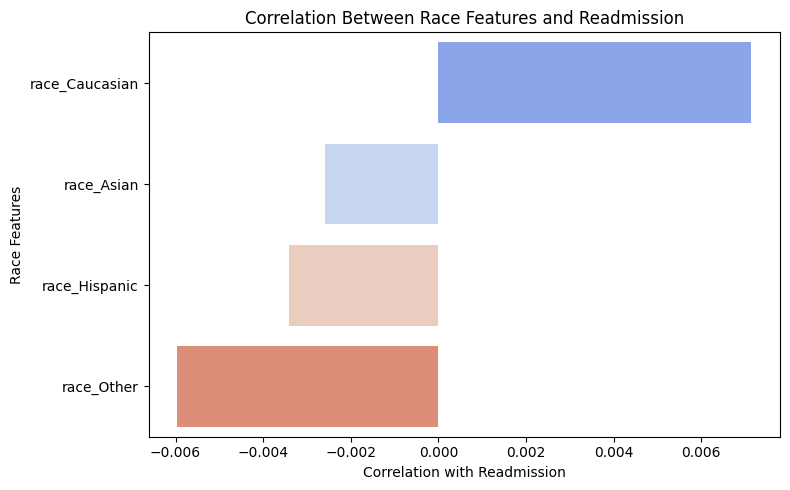

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=race_corr.values, y=race_corr.index, palette='coolwarm')
plt.title('Correlation Between Race Features and Readmission')
plt.xlabel('Correlation with Readmission')
plt.ylabel('Race Features')
plt.tight_layout()
plt.show()

In [24]:
#Machine Learning Models 
#Import ML/metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Visualizations 

import matplotlib.pyplot as plt

# Helper Function for Specificity
def calc_specificity(y_actual, y_pred, thresh=0.5):
    # True Negative Rate (Specificity) 
    TN = sum((y_pred < thresh) & (y_actual == 0))  # True Negatives
    FP = sum((y_pred >= thresh) & (y_actual == 0))  # False Positives
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    return specificity

# Helper Function for Prevalence
def calc_prevalence(y_actual):
    # Proportion of positive samples
    prevalence = sum(y_actual) / len(y_actual)
    return prevalence


Coefficient (slope): 0.17189627369302007
Intercept: 1.6497392459075324
Mean Squared Error: 6.816014013340175
R² Score: 0.21691696099516133


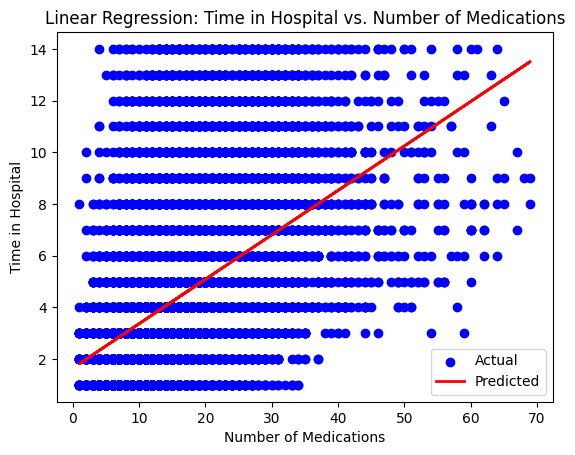

In [17]:
#Linear Regression
 
# Define X (feature) and y (target)
X = diabetes_cleaned[['num_medications']]
y = diabetes_cleaned['time_in_hospital']

#Split Test,Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Number of Medications')
plt.ylabel('Time in Hospital')
plt.title('Linear Regression: Time in Hospital vs. Number of Medications')
plt.legend()
plt.show()

Coefficient (slope): 0.020287533775351037
Intercept: 3.0635408189792193
Mean Squared Error: 8.609166979617344
R² Score: 0.010903934689080463


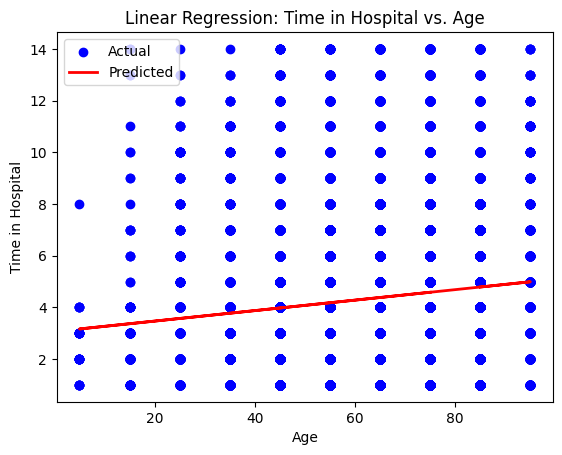

In [19]:
#Linear Regression
 
# Define X (feature) and y (target)
X = diabetes_cleaned[['age']]
y = diabetes_cleaned['time_in_hospital']

#Split Test,Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Time in Hospital')
plt.title('Linear Regression: Time in Hospital vs. Age')
plt.legend()
plt.show()

Coefficient (slope): 0.3444460674737532
Intercept: 1.8450974657381152
Mean Squared Error: 8.320366972362105
R² Score: 0.044083794193979675


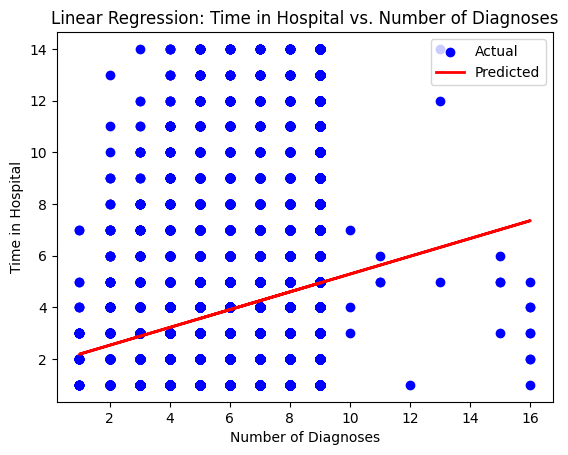

In [16]:
#Linear Regression
 
# Define X (feature) and y (target)
X = diabetes_cleaned[['number_diagnoses']]
y = diabetes_cleaned['time_in_hospital']

#Split Test,Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Number of Diagnoses')
plt.ylabel('Time in Hospital')
plt.title('Linear Regression: Time in Hospital vs. Number of Diagnoses')
plt.legend()
plt.show()

Coefficient (slope): 0.16826209569416353
Intercept: 4.294477995727788
Mean Squared Error: 8.645263325633257
R² Score: 0.0067568721566692025


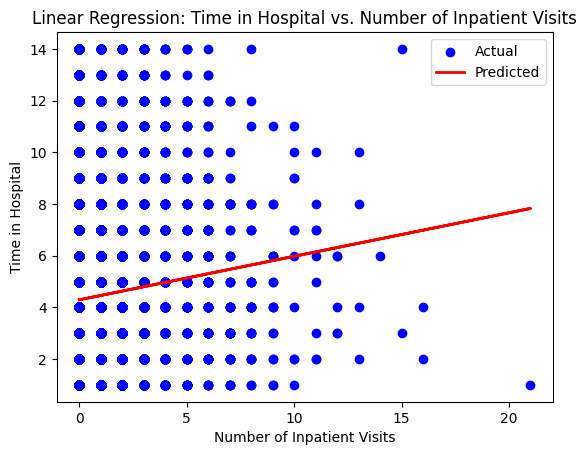

In [17]:
#Linear Regression
 
# Define X (feature) and y (target)
X = diabetes_cleaned[['number_inpatient']]
y = diabetes_cleaned['time_in_hospital']

#Split Test,Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Number of Inpatient Visits')
plt.ylabel('Time in Hospital')
plt.title('Linear Regression: Time in Hospital vs. Number of Inpatient Visits')
plt.legend()
plt.show()

In [27]:
#Brainstorming to Fix "String/Unknown" Error while trying to run Linear Regression ML
non_numeric_cols = diabetes_cleaned.select_dtypes(include=['object', 'string']).columns.tolist()
print(non_numeric_cols)

['gender']


In [28]:
for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(diabetes_cleaned[col].unique())

#matches error code --> now need to determine what to do with those rows 


Column: gender
[0 1 'Unknown/Invalid']


In [29]:
diabetes_cleaned[diabetes_cleaned['gender'] == 'Unknown/Invalid']

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,A1Cresult,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,insulin_Down,insulin_No,insulin_Steady,insulin_Up
30506,Unknown/Invalid,75,1,5,5,22,0,0,0,4,...,0,0,0,0,0,1,0,1,0,0
75551,Unknown/Invalid,65,1,38,1,6,0,0,0,5,...,0,0,0,0,0,0,0,1,0,0
82573,Unknown/Invalid,75,8,59,2,21,0,0,0,9,...,0,0,0,0,0,0,0,1,0,0


In [30]:
#since there are only 3 rows we will drop them 
diabetes_cleaned = diabetes_cleaned[diabetes_cleaned['gender'] != 'Unknown/Invalid']

In [31]:
for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(diabetes_cleaned[col].unique())


Column: gender
[0 1]


In [32]:
non_numeric_cols = diabetes_cleaned.select_dtypes(include=['object', 'string']).columns.tolist()
print(non_numeric_cols)
#The issue still exists

['gender']


In [33]:
#Reconvert "gender" to bianary 
diabetes_cleaned['gender'] = diabetes_cleaned['gender'].astype(int)

In [34]:
#Check if there is still an object in "gender"
non_numeric_cols = diabetes_cleaned.select_dtypes(include=['object', 'string']).columns.tolist()
print(non_numeric_cols)

[]


In [ ]:
#Logistic Regression Model 
# 1. Set Target Variables 
y = diabetes_cleaned['readmitted']
X = diabetes_cleaned.drop('readmitted', axis=1)

# 2. Split Dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Model
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 4. Prediction from test data 
y_pred = log_reg.predict(X_test)

# 5. Evaluate 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = calc_specificity(y_test, y_pred)
prevalence = calc_prevalence(y_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'Prevalence: {prevalence:.3f}')
print(f"AUC Score: {auc:.3f}")


Accuracy: 0.889
Precision: 0.546
Recall: 0.017
Specificity: 0.998
Prevalence: 0.112
AUC Score: 0.636


In [ ]:
#Low AUC Score --> Goal is 70% or higher
#Resolution: Solve Data Class Imbalance with Sampling Down due to large sample size

In [ ]:
#Treating Imbalance Logistic Regression Atempt #2 
# 1. Split the training data into positive (readmitted (1) = minroity)and negative (not readmitted within 30 days (0) = majority)

# 2. Combine X_train and y_train for resampling
train_df = X_train.copy()
train_df['readmitted'] = y_train

# 3. Separate majority (not readmitted) and minority (readmitted) classes
majority = train_df[train_df.readmitted == 0]
minority = train_df[train_df.readmitted == 1]

# 4. Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,  # sample without replacement
    n_samples=len(minority),  # match minority class
    random_state=42
)

# 5. Combine minority and downsampled majority
downsampled_df = pd.concat([majority_downsampled, minority])

# 6. Separate back to X and y
X_train_bal = downsampled_df.drop('readmitted', axis=1)
y_train_bal = downsampled_df['readmitted']

# 7. Train Logistic Regression on balanced data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bal, y_train_bal)

# 8. Predict on original test set
y_pred = log_reg.predict(X_test)

# 9. Evaluate 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = calc_specificity(y_test, y_pred)
prevalence = calc_prevalence(y_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'Prevalence: {prevalence:.3f}')
print(f"AUC Score: {auc:.3f}")

Accuracy: 0.671
Precision: 0.168
Recall: 0.494
Specificity: 0.694
Prevalence: 0.112
AUC Score: 0.636


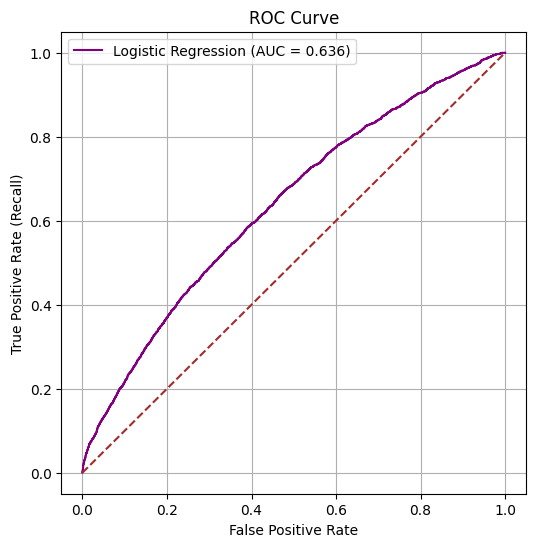

In [ ]:
# 10. ROC Curve 
# Get the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 11. Plot the ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='purple', label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='brown', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Logistic Regression Attempt #3 with Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import pandas as pd

# 1. Set Target and Features
y = diabetes_cleaned['readmitted']
X = diabetes_cleaned.drop('readmitted', axis=1)

# 2. Split Dataset (stratify keeps class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Combine training features and labels for downsampling
train_df = X_train.copy()
train_df['readmitted'] = y_train

# 4. Separate majority and minority classes
majority = train_df[train_df.readmitted == 0]
minority = train_df[train_df.readmitted == 1]

# 5. Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# 6. Combine back into a balanced dataset
downsampled_df = pd.concat([majority_downsampled, minority])

# 7. Separate features and target again
X_train_bal = downsampled_df.drop('readmitted', axis=1)
y_train_bal = downsampled_df['readmitted']

# 8. Scale
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)  # Fit and transform train
X_test_scaled = scaler.transform(X_test)  # Only transform test

# 9. Train Logistic Regression on scaled, balanced data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bal_scaled, y_train_bal)

# 10. Predict on scaled test set
y_pred = log_reg.predict(X_test_scaled)

In [ ]:
# 11. Evaluate 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = calc_specificity(y_test, y_pred)
prevalence = calc_prevalence(y_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'Prevalence: {prevalence:.3f}')
print(f"AUC Score: {auc:.3f}")

Accuracy: 0.112
Precision: 0.112
Recall: 1.000
Specificity: 0.000
Prevalence: 0.112
AUC Score: 0.598


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Metrics for Decision Tree on Validation Data:
AUC: 0.613
Accuracy: 0.884
Recall: 0.016
Precision: 0.218
Specificity: 0.993


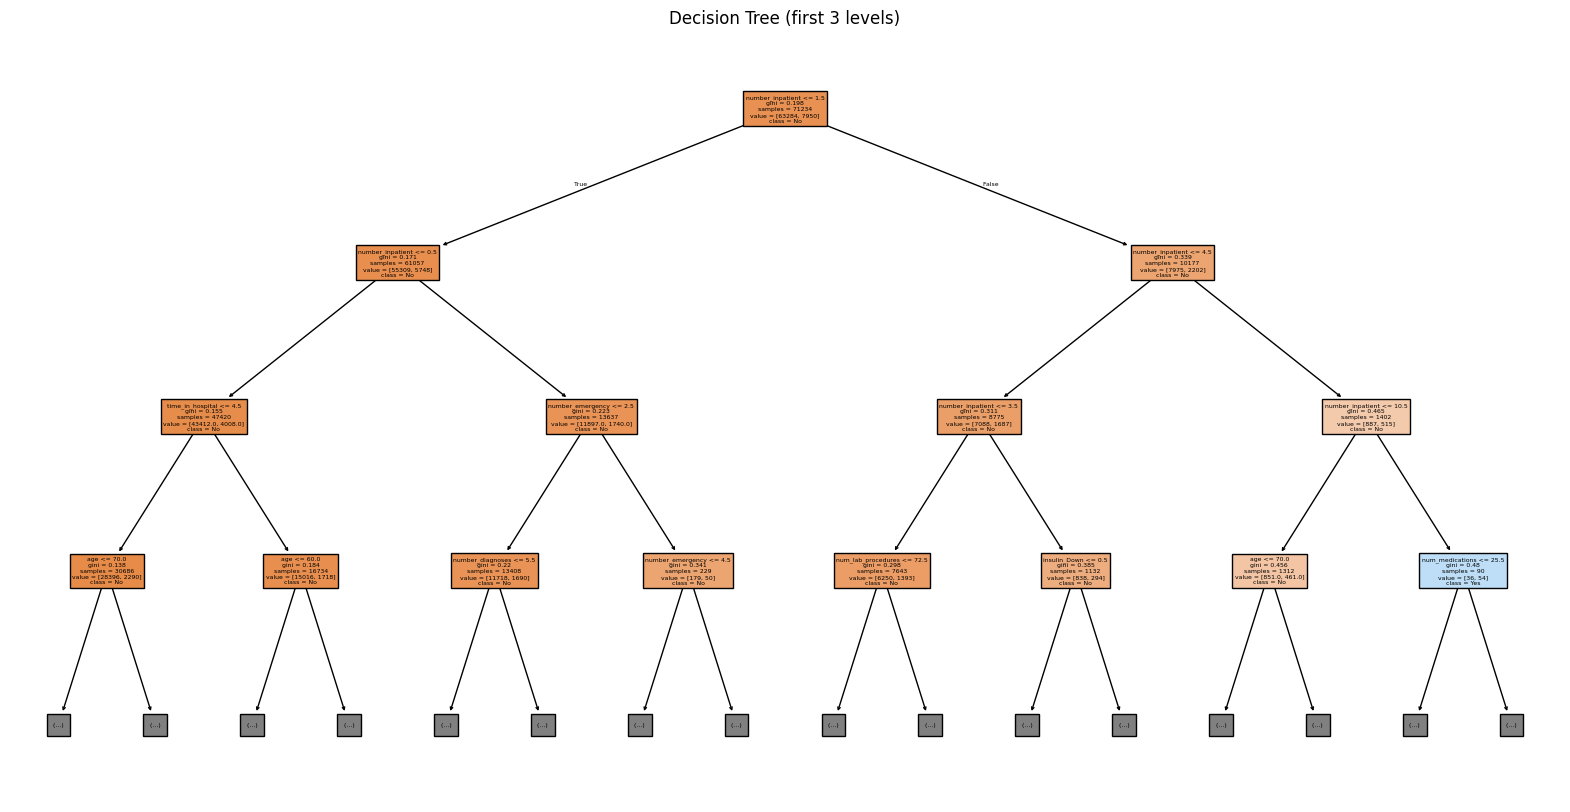

In [ ]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Define variables 
X = diabetes_cleaned.drop('readmitted', axis=1)
y = diabetes_cleaned['readmitted']

# 2. Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Decision Tree
dc_clf = DecisionTreeClassifier(random_state=42, max_depth=10)
dc_clf.fit(X_train, y_train)

# 4. Prediction 
dc_preds_proba = dc_clf.predict_proba(X_valid)[:, 1]
dc_preds = dc_clf.predict(X_valid)

# 5. Helper functions for evaluation
def calc_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

def print_report(y_true, y_probs, threshold=0.5):
    y_pred = (y_probs >= threshold).astype(int)
    auc = roc_auc_score(y_true, y_probs)
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    specificity = calc_specificity(y_true, y_pred)
    
    print(f"AUC: {auc:.3f}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Specificity: {specificity:.3f}")
    
    return auc, acc, recall, precision, specificity

# 6. Evaluate model
print("Metrics for Decision Tree on Validation Data:")
print_report(y_valid, dc_preds_proba, threshold=0.5)

# 7. Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dc_clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, max_depth=3)
plt.title("Decision Tree")
plt.show()

In [ ]:
# Extended analysis centered on 'readmitted':

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from xgboost import XGBClassifier